In [1]:
%load_ext autoreload
%autoreload 2

# Define autoreload so that we don't have to reset the kernel every time after changing the files

In [2]:
# Define the system paths
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parents[3] # Gets the GitHub repo folder
print(project_root)
sys.path.append(str(project_root))

# Import modules

import torch
import pandas as pd
import matplotlib.pyplot as plt

C:\SenkDosya\Projects\FINCH-Science_SyntheticData


In [3]:
# Import code

from defs.diffusion.helper.noising.noising import *
from defs.diffusion.helper.plotting.plotting import *

In [4]:
# Import data

df = pd.read_csv(r'C:\SenkDosya\UTAT\Data\General_Data\simpler_data_rwc.csv')

data = df.iloc[:, 7:].to_numpy(dtype=np.float64)

print(data)


[[0.05945142 0.06440255 0.07002581 ... 0.20288342 0.08395094 0.02406419]
 [0.05861448 0.06322138 0.06855085 ... 0.06126626 0.10420719 0.03176397]
 [0.04946129 0.0532802  0.05762918 ... 0.22723868 0.03629987 0.01058028]
 ...
 [0.02633246 0.02696881 0.02848575 ... 0.08798267 0.19825926 0.18957973]
 [0.02626704 0.02579437 0.02756352 ... 0.0990945  0.11365661 0.17497927]
 [0.0250598  0.02427512 0.02545164 ... 0.0735709  0.11222987 0.22417896]]


In [7]:
trial_index = 0
t_max = 1000
exp = 2
offset = 0.0008

Cosine = CosSchedule(steps=t_max, offset=offset, exp=exp)

trial_spectrum = torch.from_numpy(data[trial_index,])
trial_spectrum = (2 * trial_spectrum) - 1 #Normalize -1 to 1


wavelengths = torch.arange(400, 2500, 10)

matrix = torch.zeros(t_max + 1, 210)

for i in range(1001):

    time_tens = torch.tensor([i])
    _, noised = Cosine.add_noise(trial_spectrum, time_tens)
    matrix[i, :] = noised


C:\SenkDosya\Projects\FINCH-Science_SyntheticData\defs\diffusion\helper\noising\noising.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.alpha_bars = torch.tensor(f/f_0, dtype=torch.float32)


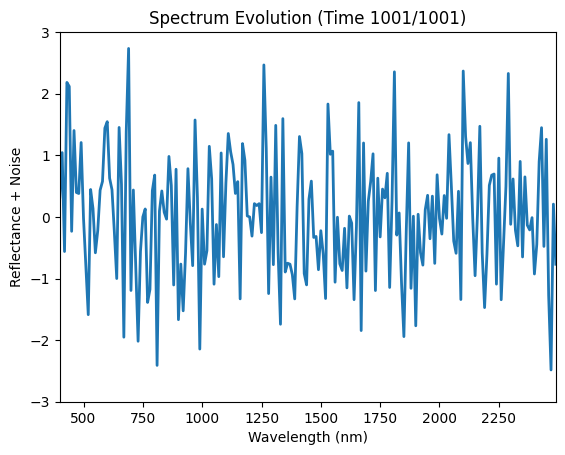

In [8]:
animate_change(spectral_matrix=matrix, wavelengths=wavelengths, interval=100, repeat=True, save_path=r"C:\SenkDosya\Projects\FINCH-Science_SyntheticData\defs\diffusion\helper\plotting\trial.gif")

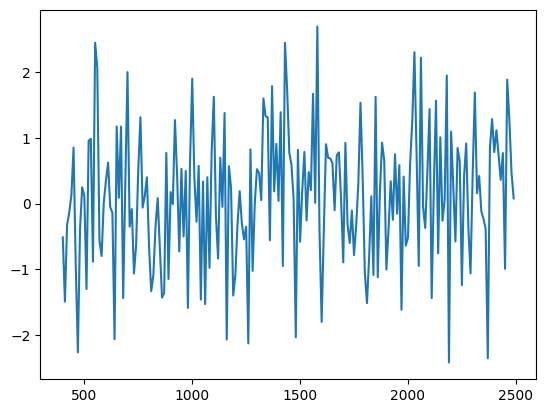

In [16]:
# Testing what pure noise would look like with our spectral dims:

noise = torch.randn_like(trial_spectrum, device=trial_spectrum.device)

plt.plot(wavelengths, noise)
plt.show()